# 传染病模型及其预测

这一节课介绍几个经典的传染病模型，并用python语言来编写代码，观察不同模型的预测结果，进而深入理解这些模型。

## SI模型

在该模型里面，群体中只有两种人：易感者和感染者。

感染者每天会感染一定的数量的易感者。

S表示易感者（尚未感染但是容易被感染的人） 的数量

I表示感染者（已经感染的人）的数量

N表示人口总数 

r表示一个感染者平均每天感染易感者的人数 

那么每天易感者和感染者的数量变化为

$\begin{align}
dS &= \frac{-rSI}{N} \\
dI &= \frac{rSI}{N}
\end{align}$

In [1]:
import numpy as np   # 科学计算工具包
import matplotlib.pyplot as plt  # 画图工具包

plt.rcParams["font.family"] = 'Arial Unicode MS'  # 用来正常显示中文

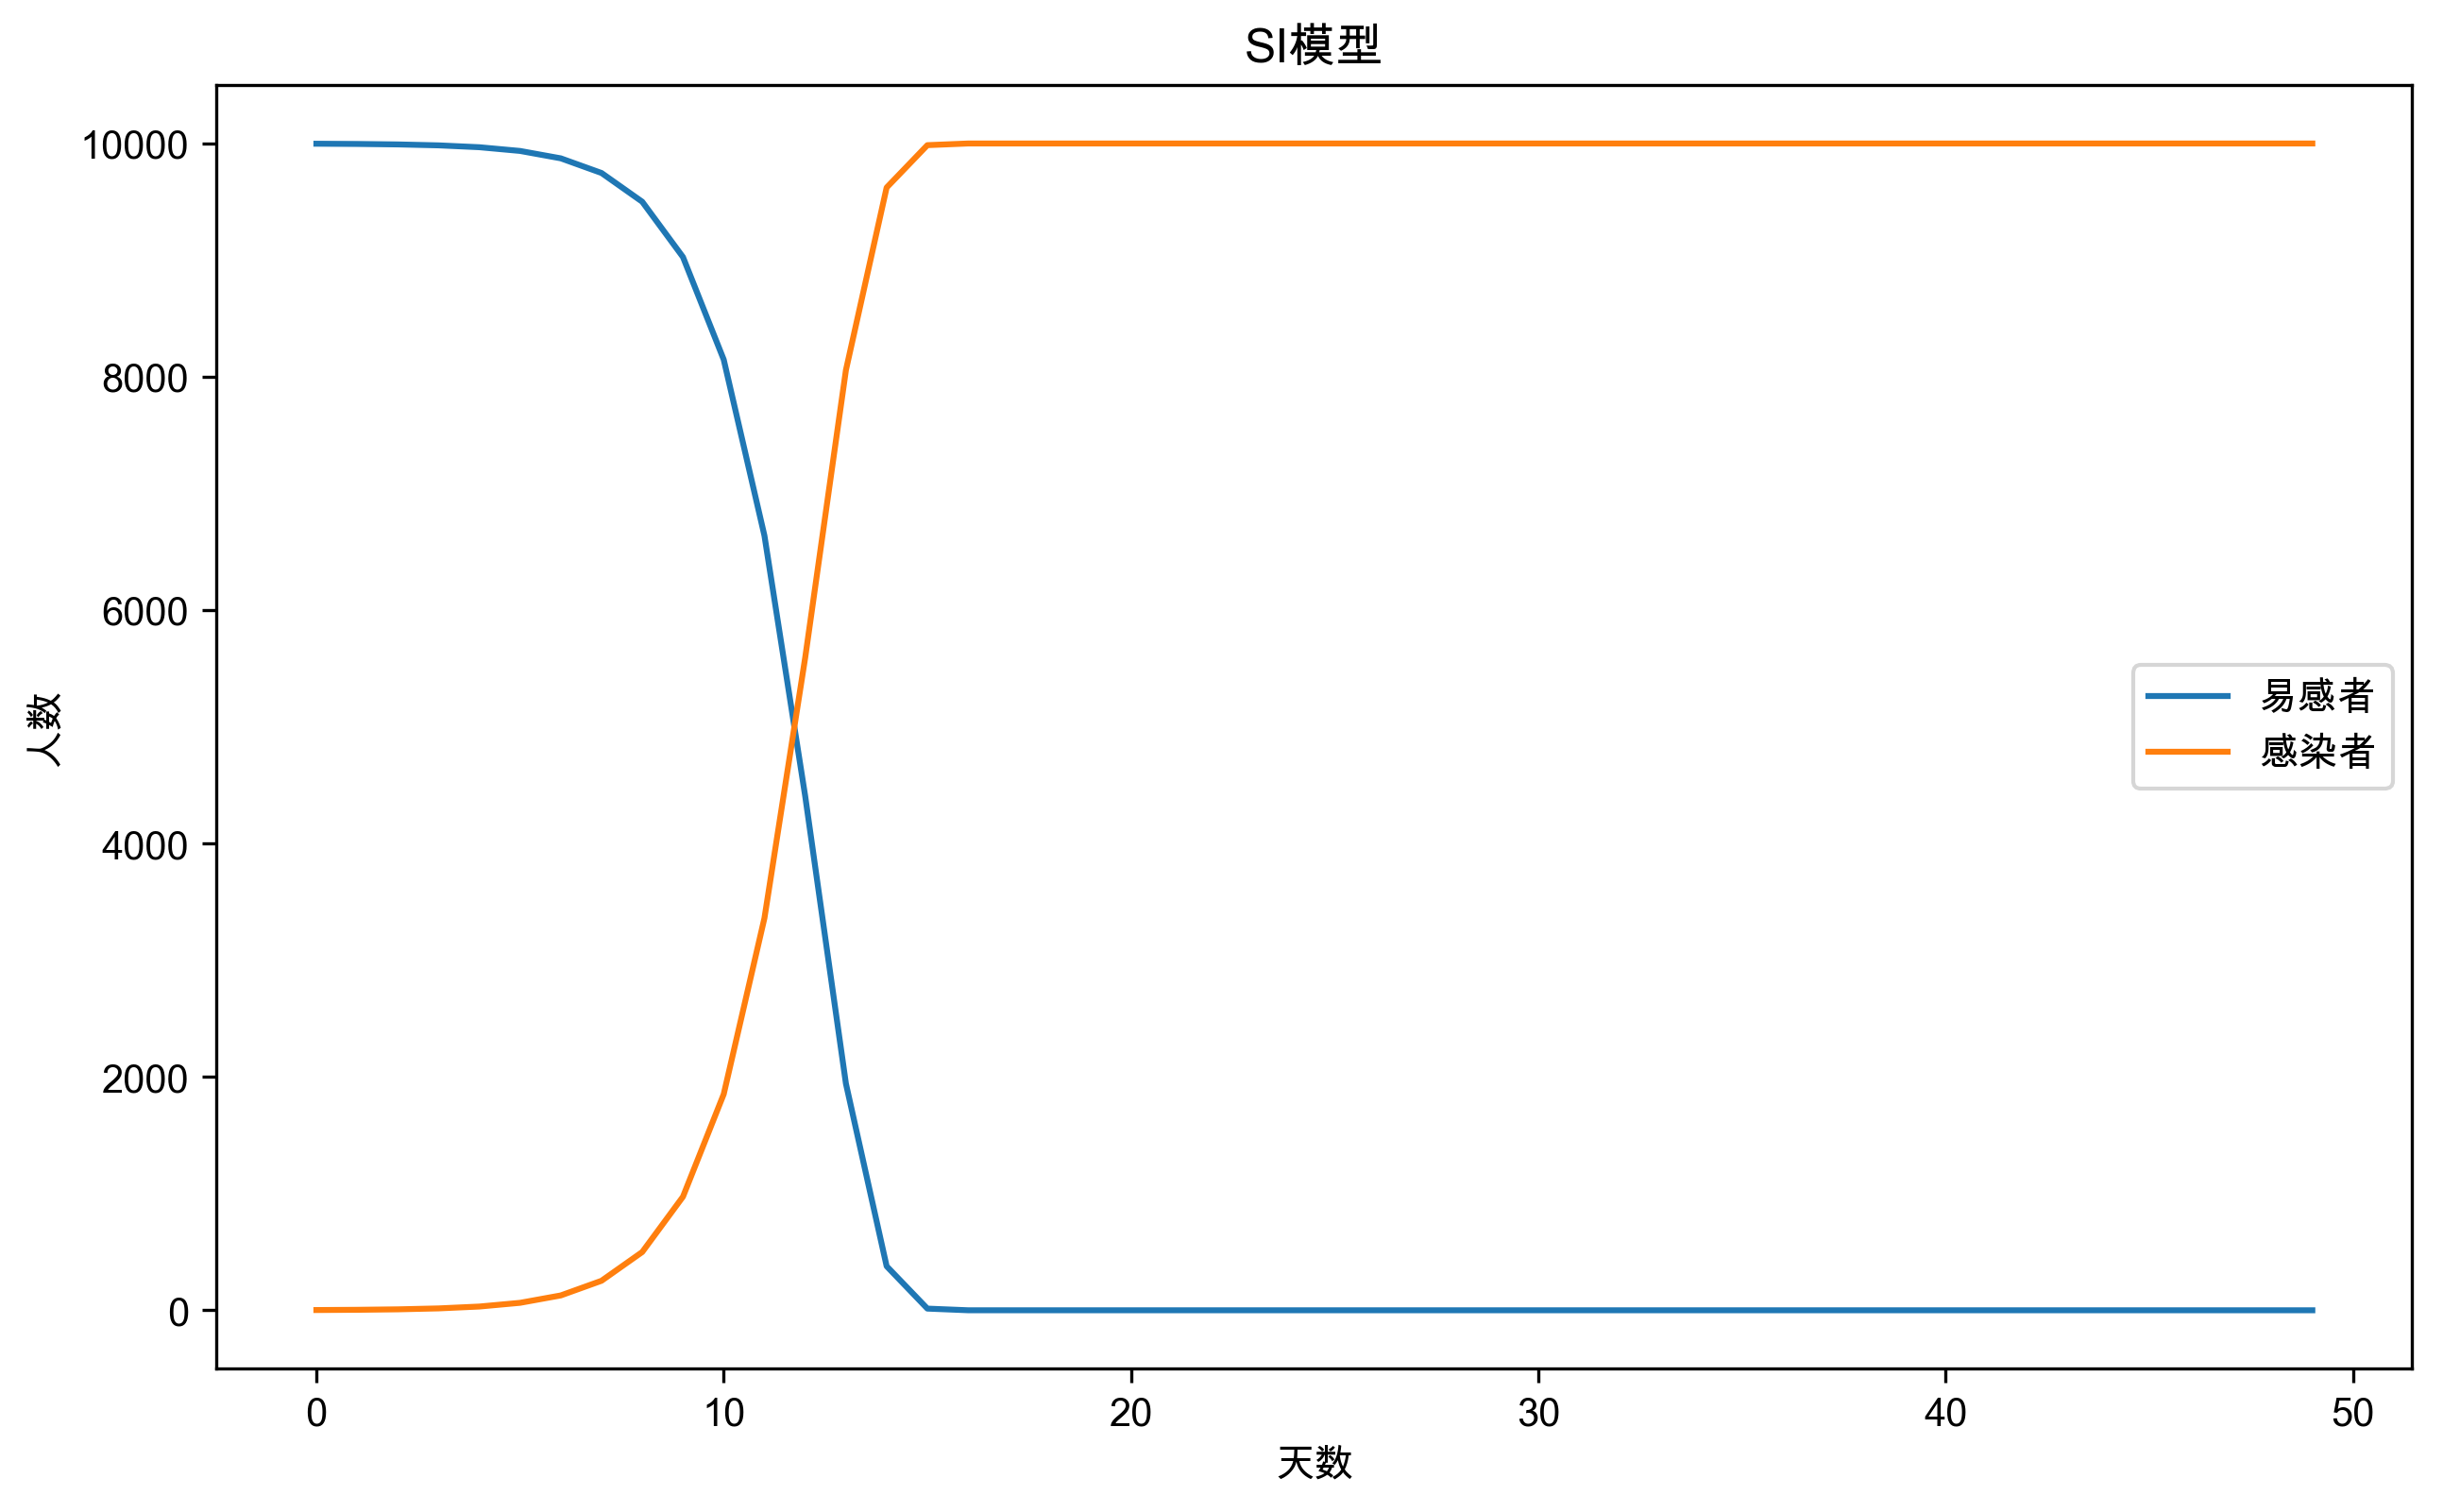

In [188]:
# 定义SI函数——根据SI模型计算每天新增的易感人数和感染人数，返回累计人数
def SI(si,dt):
    S,I = si          # 每天初始SI的数值
    dS = -(r*I*S)/N   # 易感者微分方程
    dI = r*I*S/N      # 感染者微分方程
    S = 0 if S+dS*dt<=0 else S+dS*dt      # 当天易感者人数    
    I = N if I+dI*dt>=N else I+dI*dt      # 当天感染者人数
    return [S, I]

def calculate(func,si,days):  
    dt = 1
    t = np.arange(0,days,dt) # 设置时间步
    res = []
    for itm in t:
        si=func(si,dt)      # 运行SI模型函数
        res.append(si)      # 存储每天人数结果
    return np.array(res)

# 画图函数
def plot_graph(np_res): 
    plt.figure(figsize=(10,6),dpi=300)
    plt.plot(np_res[:,0])
    plt.plot(np_res[:,1])
    plt.title("SI模型")
    plt.xlabel("天数")
    plt.ylabel("人数")
    plt.legend(['易感者','感染者'])
    plt.show()
    

N = 10000
I = 1
r = 1
days = 50
si= [N-I,    # 易感人数
       I]    # 感染人数

result = calculate(SI,si,days)
plot_graph(result)

可以看出，在SI模型中，只要r大于0，最终所有人都会感染病毒。

## SIS模型

在该模型里面，群体中依然只有两种人：易感者和感染者。

感染者每天会感染一定的数量的易感者，同时每天会有一定数量的感染者康复，但是他们康复之后依然有可能被感染。

S表示易感者（尚未感染但是容易被感染的人） 的数量

I表示感染者（已经感染的人）的数量

N表示人口总数 

r表示一个感染者平均每天感染易感者的人数 

$\mu$ 表示感染者每天康复的比例 

那么每天易感者和感染者的数量变化为

$\begin{align}
dS &= \frac{-rSI}{N} + \mu I\\
dI &= \frac{rSI}{N} - \mu I \\
\end{align}$

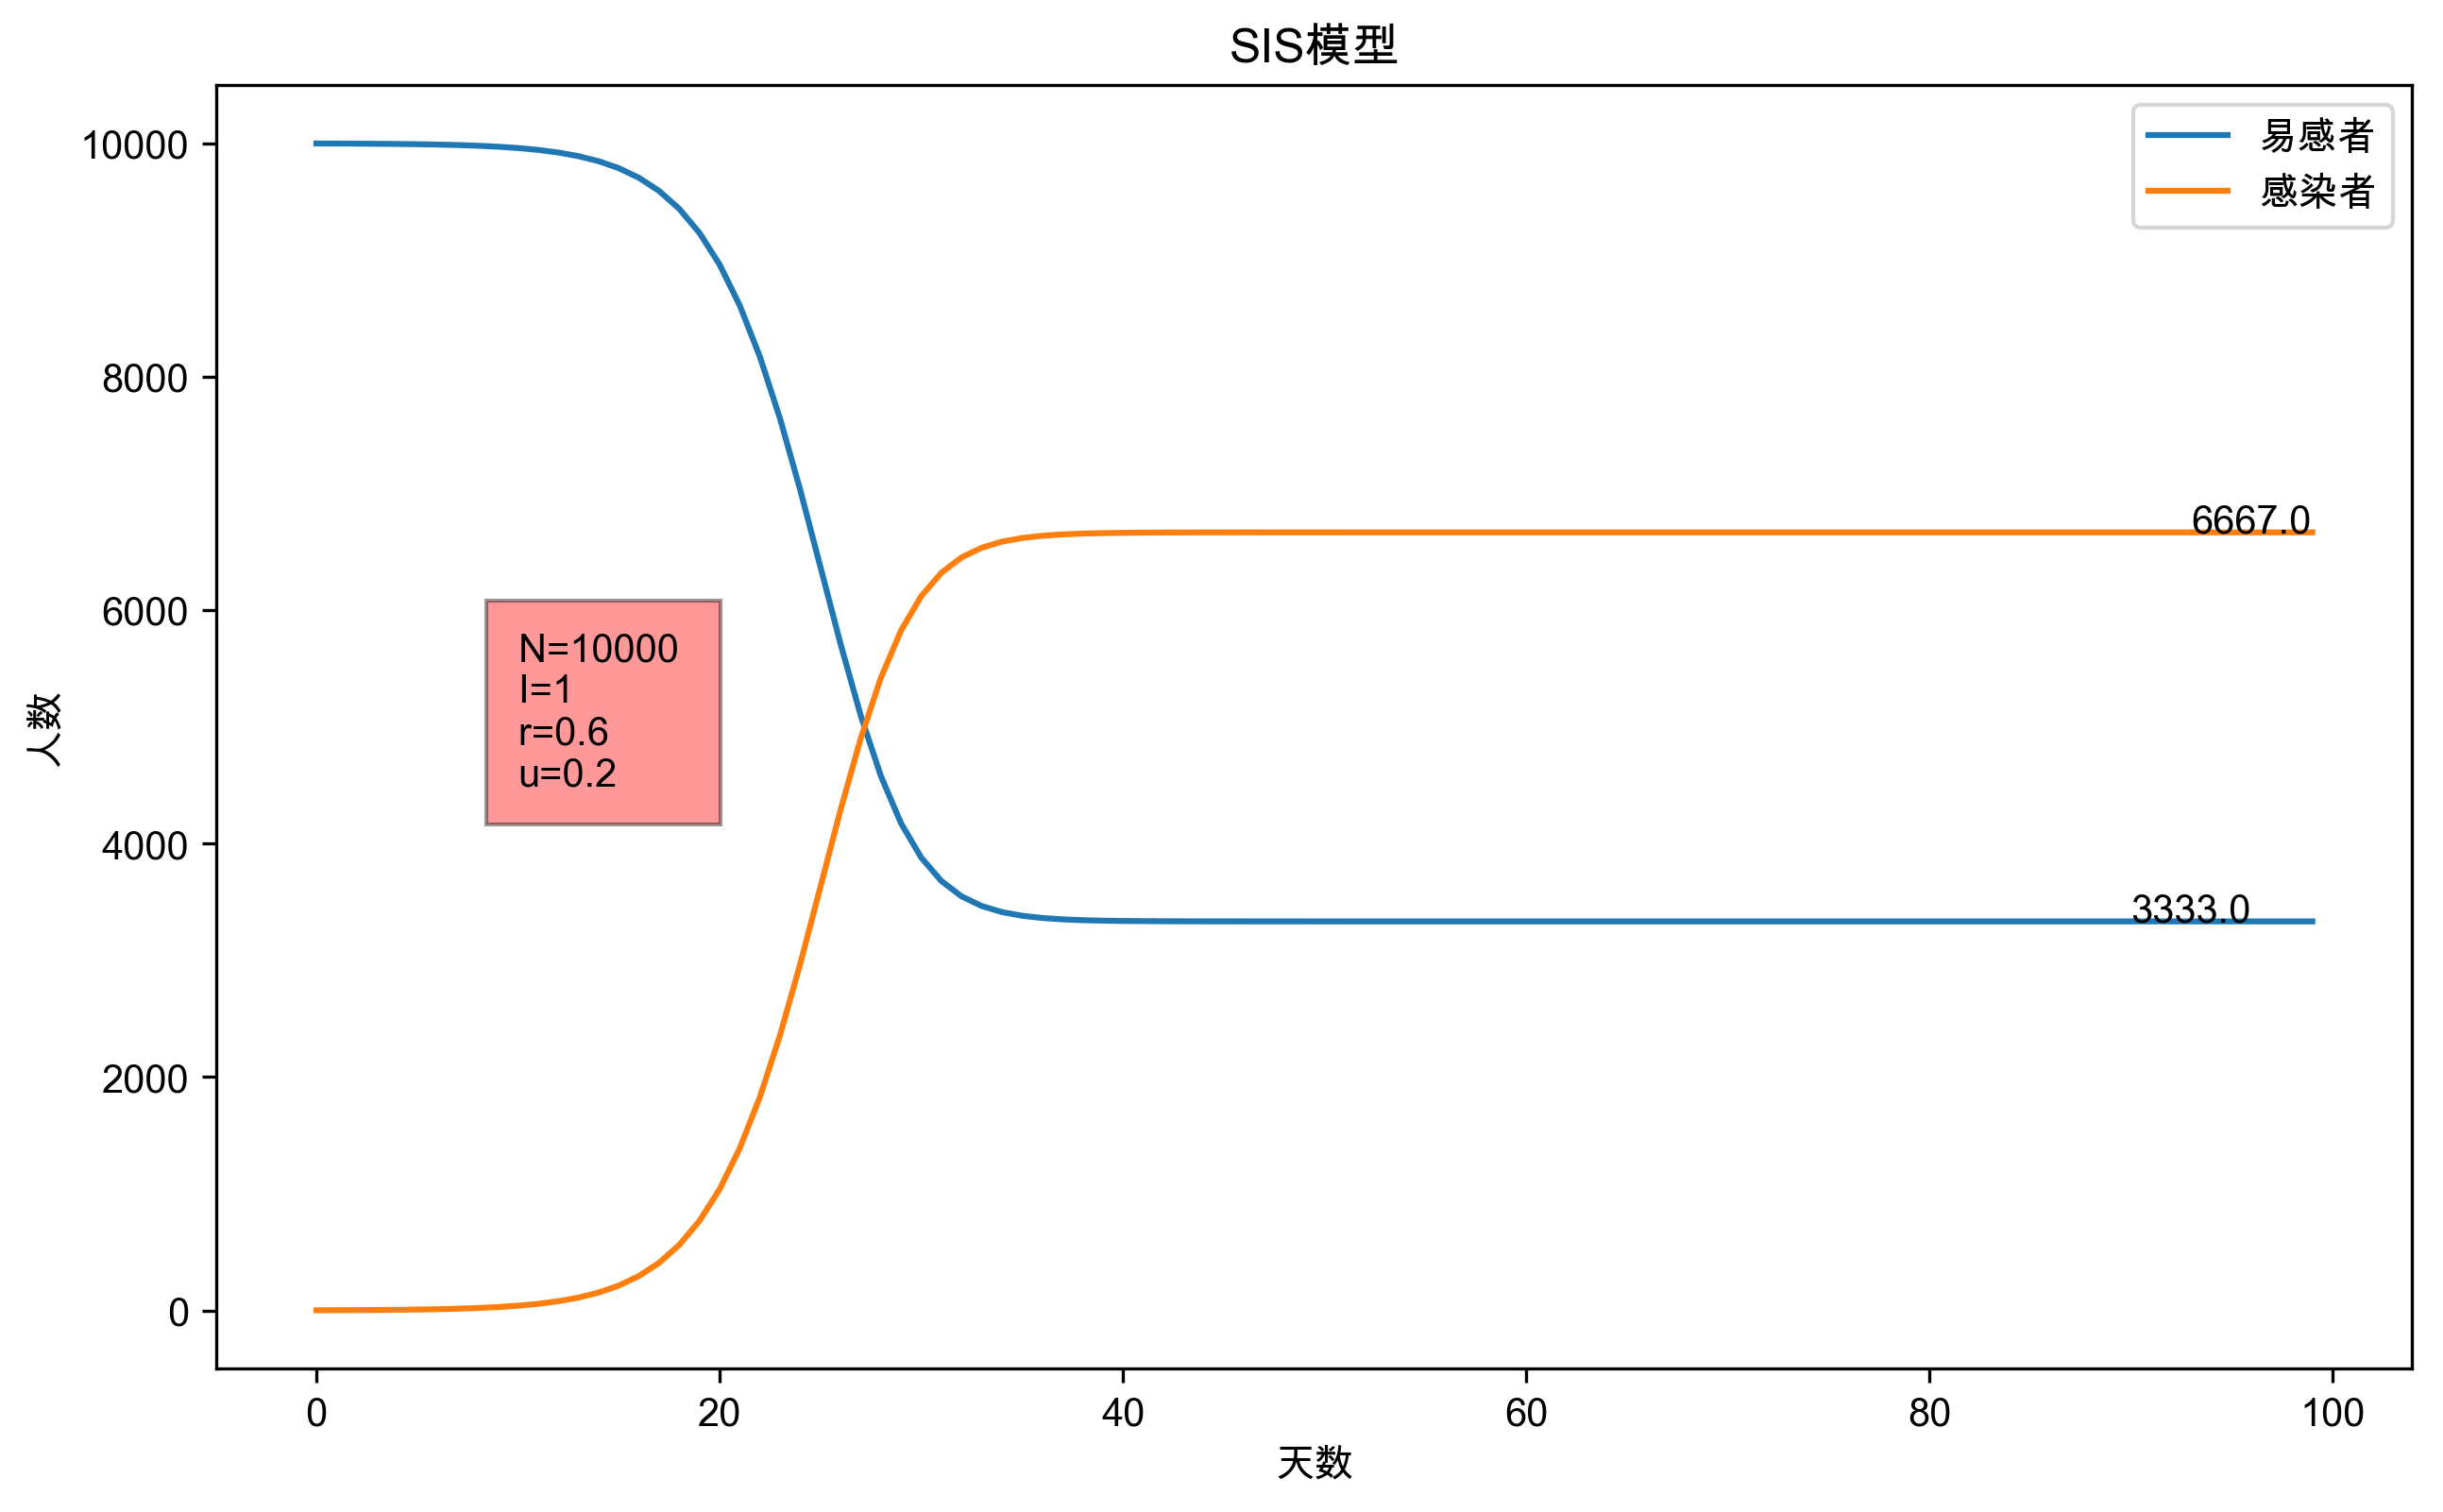

[3333.33333333 6666.66666667]


In [194]:
# 定义SIS函数——根据SIS模型计算每天新增的易感人数和感染人数，返回累计人数
def SIS(sis,dt):
    S,I = sis          # 每天初始SI的数值
    dS = -(r*I*S)/N + u*I   # 易感者微分方程
    dI = r*I*S/N - u*I     # 感染者微分方程
    S = 0 if S+dS*dt<=0 else S+dS*dt    # 当天易感者人数
    I = N if I+dI*dt>=N else I+dI*dt    # 当天感染者人数
    return [S, I]

def calculate(func,sis,days):  
    dt = 1
    t = np.arange(0,days,dt) # 设置时间步
    res=[]
    for itm in t:
        sis=func(sis,dt)      # 运行SI模型函数
        res.append(sis)      # 存储每天人数结果
    return np.array(res)

# 画图函数
def plot_graph(np_res): 
    plt.figure(figsize=(10,6),dpi=300)
    plt.plot(np_res[:,0])
    plt.plot(np_res[:,1])
    plt.title("SIS模型")
    plt.xlabel("天数")
    plt.ylabel("人数")
    plt.legend(['易感者','感染者'])
    plt.text(10,4500,'N=%d \nI=%d \nr=%2.1f \nu=%2.1f' % (N,I,r,u), bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 8})
    final = [round(x) for x in result[-1]]  # 取整表示
    plt.text(90,final[0],final[0])
    plt.text(93,final[1],final[1])
    plt.show()

# 赋值绘图
N = 10000
I = 1
r = 0.6
u = 0.2
days = 100

sis= [N-I,    # 易感人数
       I]    # 感染人数

result = calculate(SIS,sis,days)
plot_graph(result)
print(result[-1])

可以看出，在SIS模型中，并非所有的人都会被感染，最终感染人数为：

$$I = N(1-\frac{u}{r})$$

## 基本再生数 basic reproductive number

这里，从SIS模型中引出了一个概念，就是基本再生数，其定义为：

$$R_0 = \frac{r}{u}$$

r 表示感染的速率，u 表示治愈的速率

如果 r>u 也就是 $R_0>1$ 时，感染的速度快于治愈的速度，那么疾病就会传播开来，

而且$R_0$越大，传播速度越快，感染人数越多；

如果 r<u 也就是 $R_0<1$ 时，感染的速度慢于治愈的速度，那么疾病就不会传播开来。

这里我们可以看看其他传染病的基本再生数

https://zhuanlan.zhihu.com/p/104128326?utm_source=wechat_timeline


In [109]:
%%html
<img src="https://pic1.zhimg.com/80/v2-313742c7f3a22d901cd3fff5d90e4508_1440w.jpg" width=800>

## SIR模型 

在该模型里面，群体中有三种人：易感者，感染者，康复者（包括死亡者）。

感染者每天会感染一定的数量的易感者，同时每天会有一定数量的感染者康复（或者死亡），而且他们康复之后不可能再次被感染（拥有了抗体）。

S表示易感者（尚未感染但是容易被感染的人） 的数量

I表示感染者（已经感染的人）的数量

R表示康复者（包括治愈和死亡的人）的数量

N表示人口总数 

r表示一个感染者平均每天感染易感者的人数 

$\mu$ 表示感染者每天康复（含死亡）的比例 

那么每天易感者/感染者/康复者的数量变化为

$\begin{align}
dS &= \frac{-rSI}{N} \\
dI &= \frac{rSI}{N} - \mu I \\
dR &= \mu I \\
\end{align}$

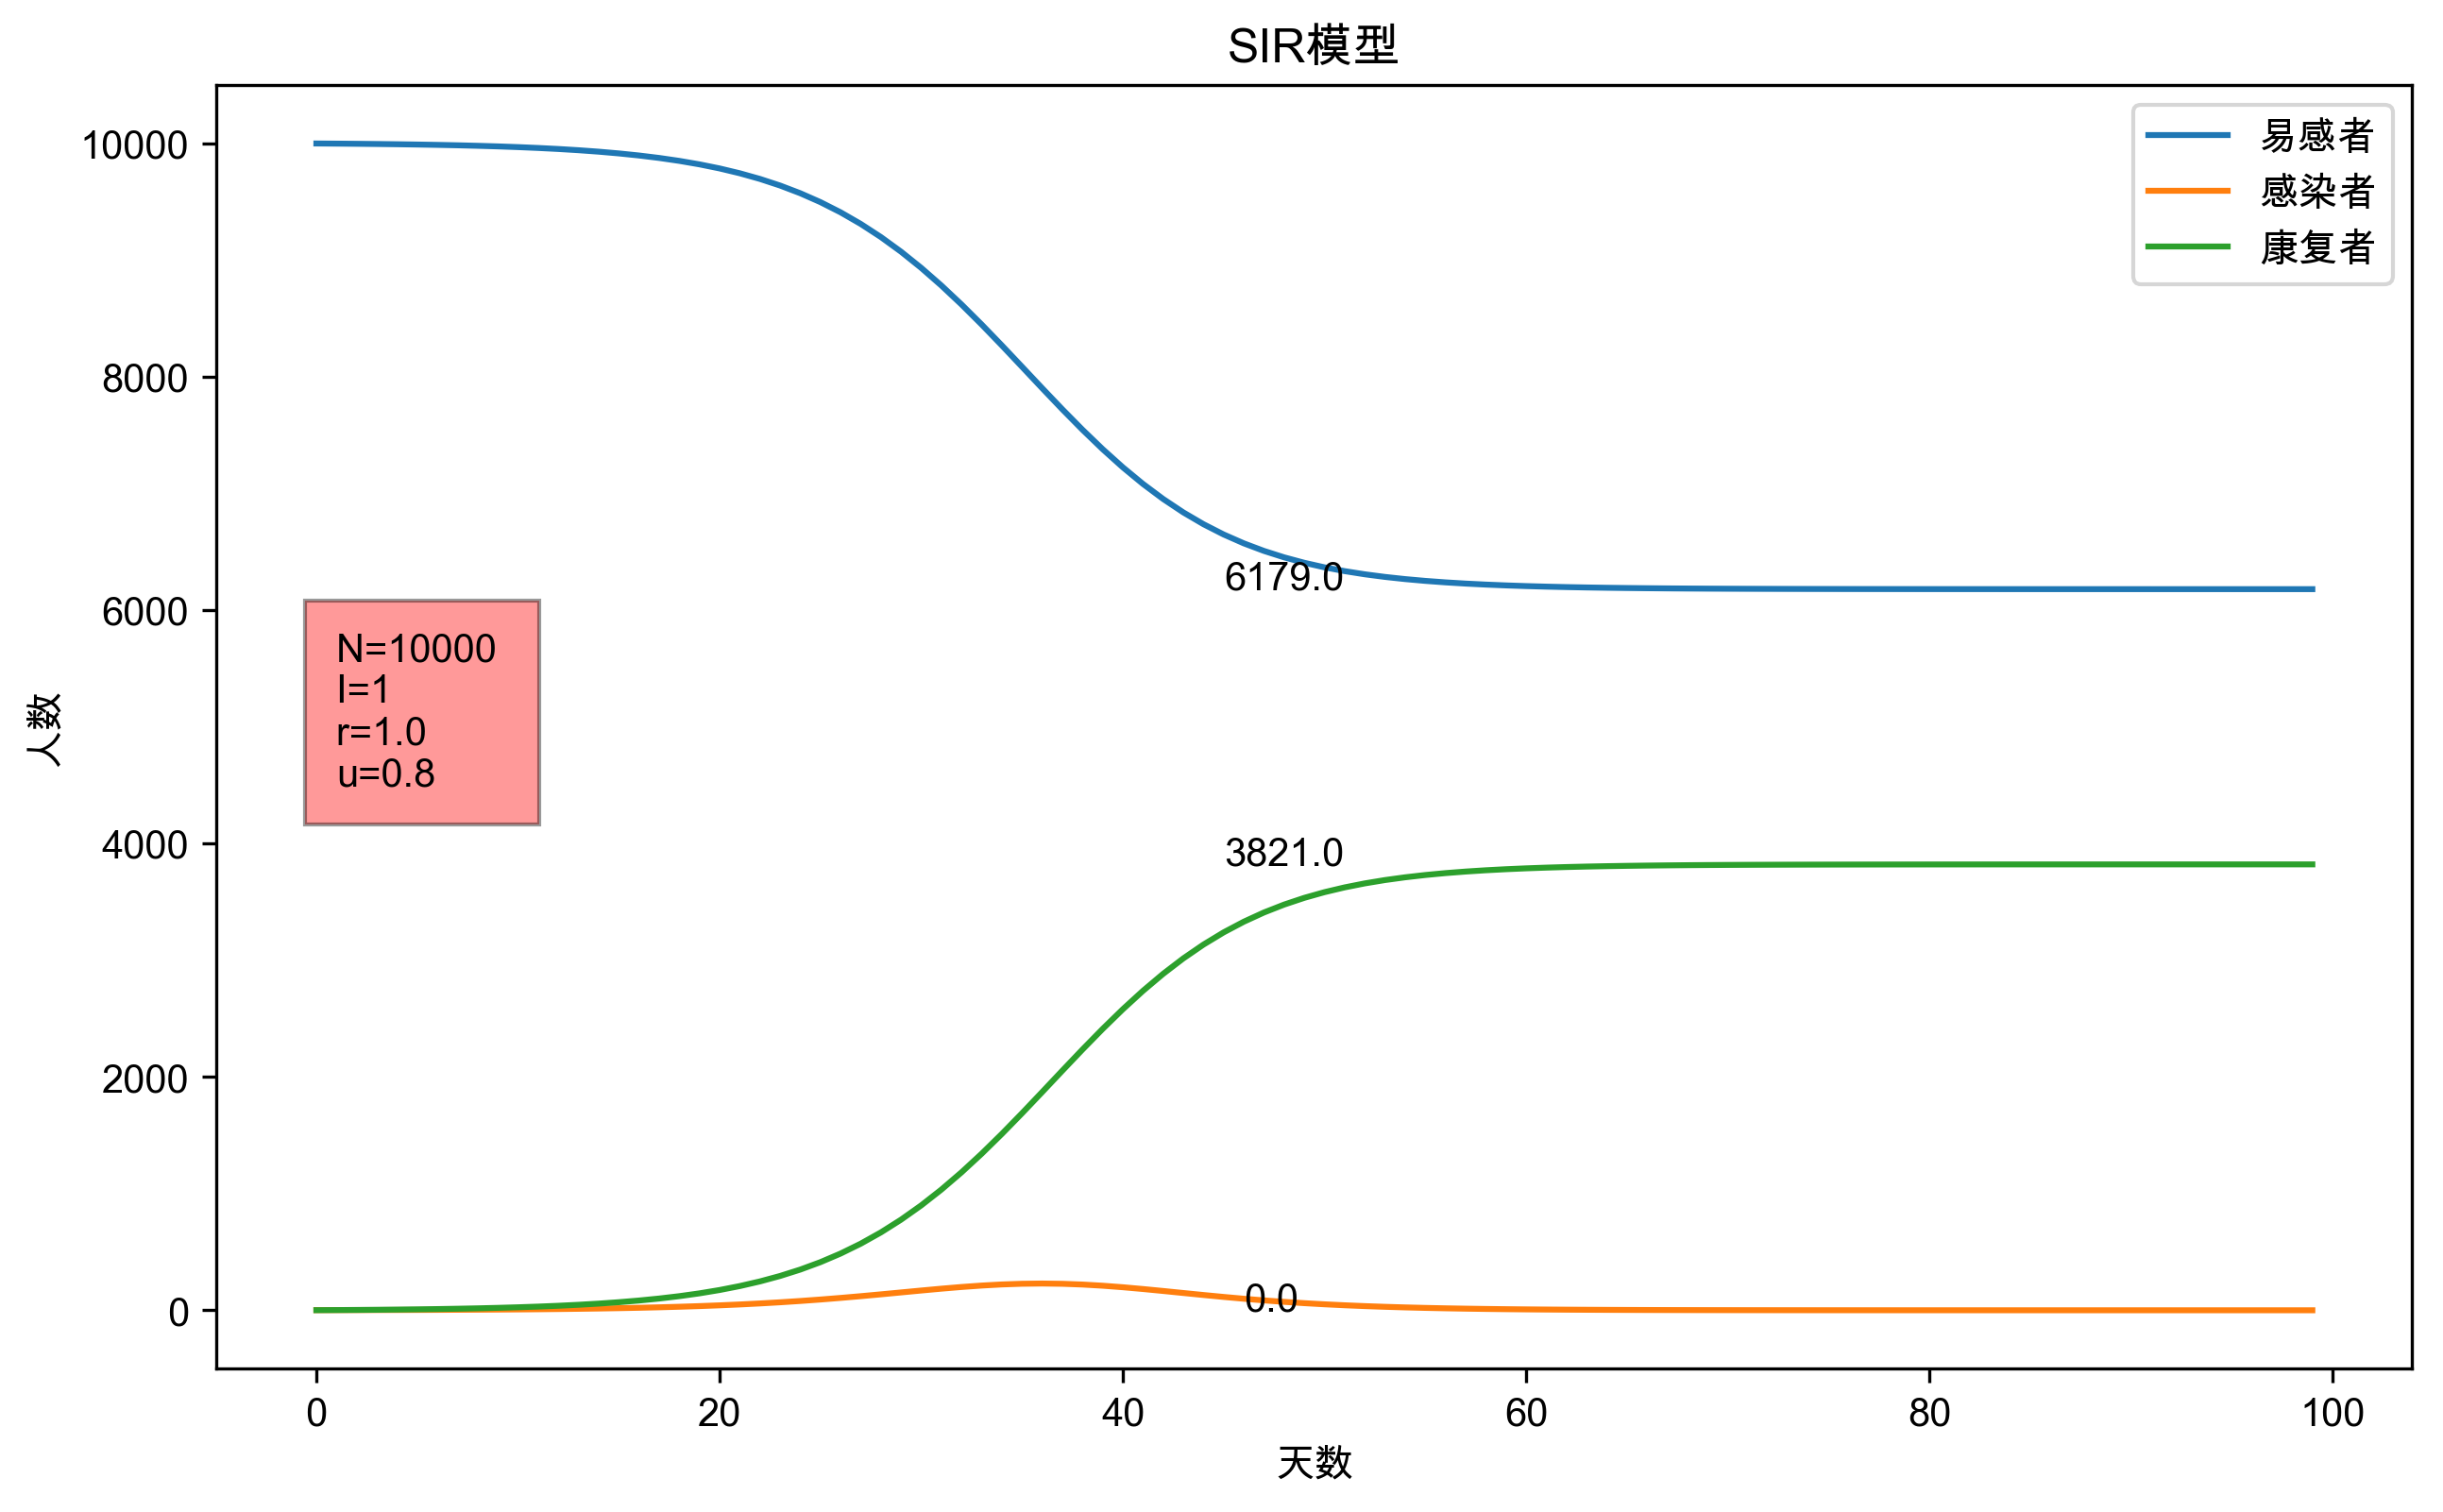

[6179.0, 0.0, 3821.0]


In [198]:
# 定义SIR函数——根据SIR模型计算每天新增的易感人数，感染人数，康复人数，返回累计人数
def SIR(sir,dt):
    S,I,R = sir             # 每天初始SIR的数值
    dS = -(r*I*S)/N         # 易感者微分方程
    dI = r*I*S/N - u*I      # 感染者微分方程
    dR = u*I                # 康复者微分方程
    S = 0 if S+dS*dt<=0 else S+dS*dt                        # 当天易感者人数
    I = N if I+dI*dt>=N else (0 if I+dI*dt<=0 else I+dI*dt) # 当天感染者人数
    R = N if R+dR*dt>=N else (0 if R+dR*dt<=0 else R+dR*dt) # 当天康复者人数
    return [S, I, R]

def calculate(func,sir,days):  
    dt = 1
    t = np.arange(0,days,dt) # 设置时间步
    res=[]
    for itm in t:
        sir=func(sir,dt)      # 运行SI模型函数
        res.append(sir)      # 存储每天人数结果
    return np.array(res)

# 画图函数
def plot_graph(np_res): 
    plt.figure(figsize=(10,6),dpi=300)
    plt.plot(np_res[:,0])
    plt.plot(np_res[:,1])
    plt.plot(np_res[:,2])
    plt.title("SIR模型")
    plt.xlabel("天数")
    plt.ylabel("人数")
    plt.legend(['易感者','感染者','康复者'])
    plt.text(1,4500,'N=%d \nI=%d \nr=%2.1f \nu=%2.1f' % (N,I,r,u), bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 8})
    final = [round(x) for x in result[-1]]  # 取整表示
    plt.text(45,final[0],final[0])
    plt.text(46,final[1],final[1])
    plt.text(45,final[2],final[2])
    plt.show()

# 赋初值、绘图
N = 10000
I = 1
r = 1
u = 0.8
days = 100

sir= [N-I,    # 易感人数
       I,     # 感染人数
       0]     # 康复人数

result = calculate(SIR,sir,days)
plot_graph(result)
final = [round(x) for x in result[-1]]  # 取整表示
print(final)

## SEIR模型

考虑到感染病毒之后存在一定的潜伏期，而且病毒携带者未必一定会出现明显的症状（即患病），SEIR模型就被提出来了。

在SEIR模型中存在四种人：易感者，潜伏者，感染者（特指患病的人），康复者（含死亡者）。

感染者每天会感染一定的数量的易感者，同时每天会有一定数量的感染者康复（或者死亡），而且他们康复之后不可能再次被感染（拥有了抗体）。

S表示易感者（尚未感染但是容易被感染的人） 的数量

E表示潜伏者（已经感染尚未发病的人） 的数量

I表示感染者（已经感染的人）的数量

R表示康复者（包括治愈和死亡的人）的数量

N表示人口总数 

r表示一个感染者平均每天感染易感者的人数 

$\alpha$ 表示潜伏者每天发展感染者的比例

$\mu$ 表示感染者每天康复（含死亡）的比例 

那么每天易感者和感染者的数量变化为

$\begin{align}
dS &= \frac{-rSI}{N} \\
dE &= \frac{rSI}{N} - \alpha E \\
dI &= \alpha E - \mu I \\
dR &= \mu I \\
\end{align}$

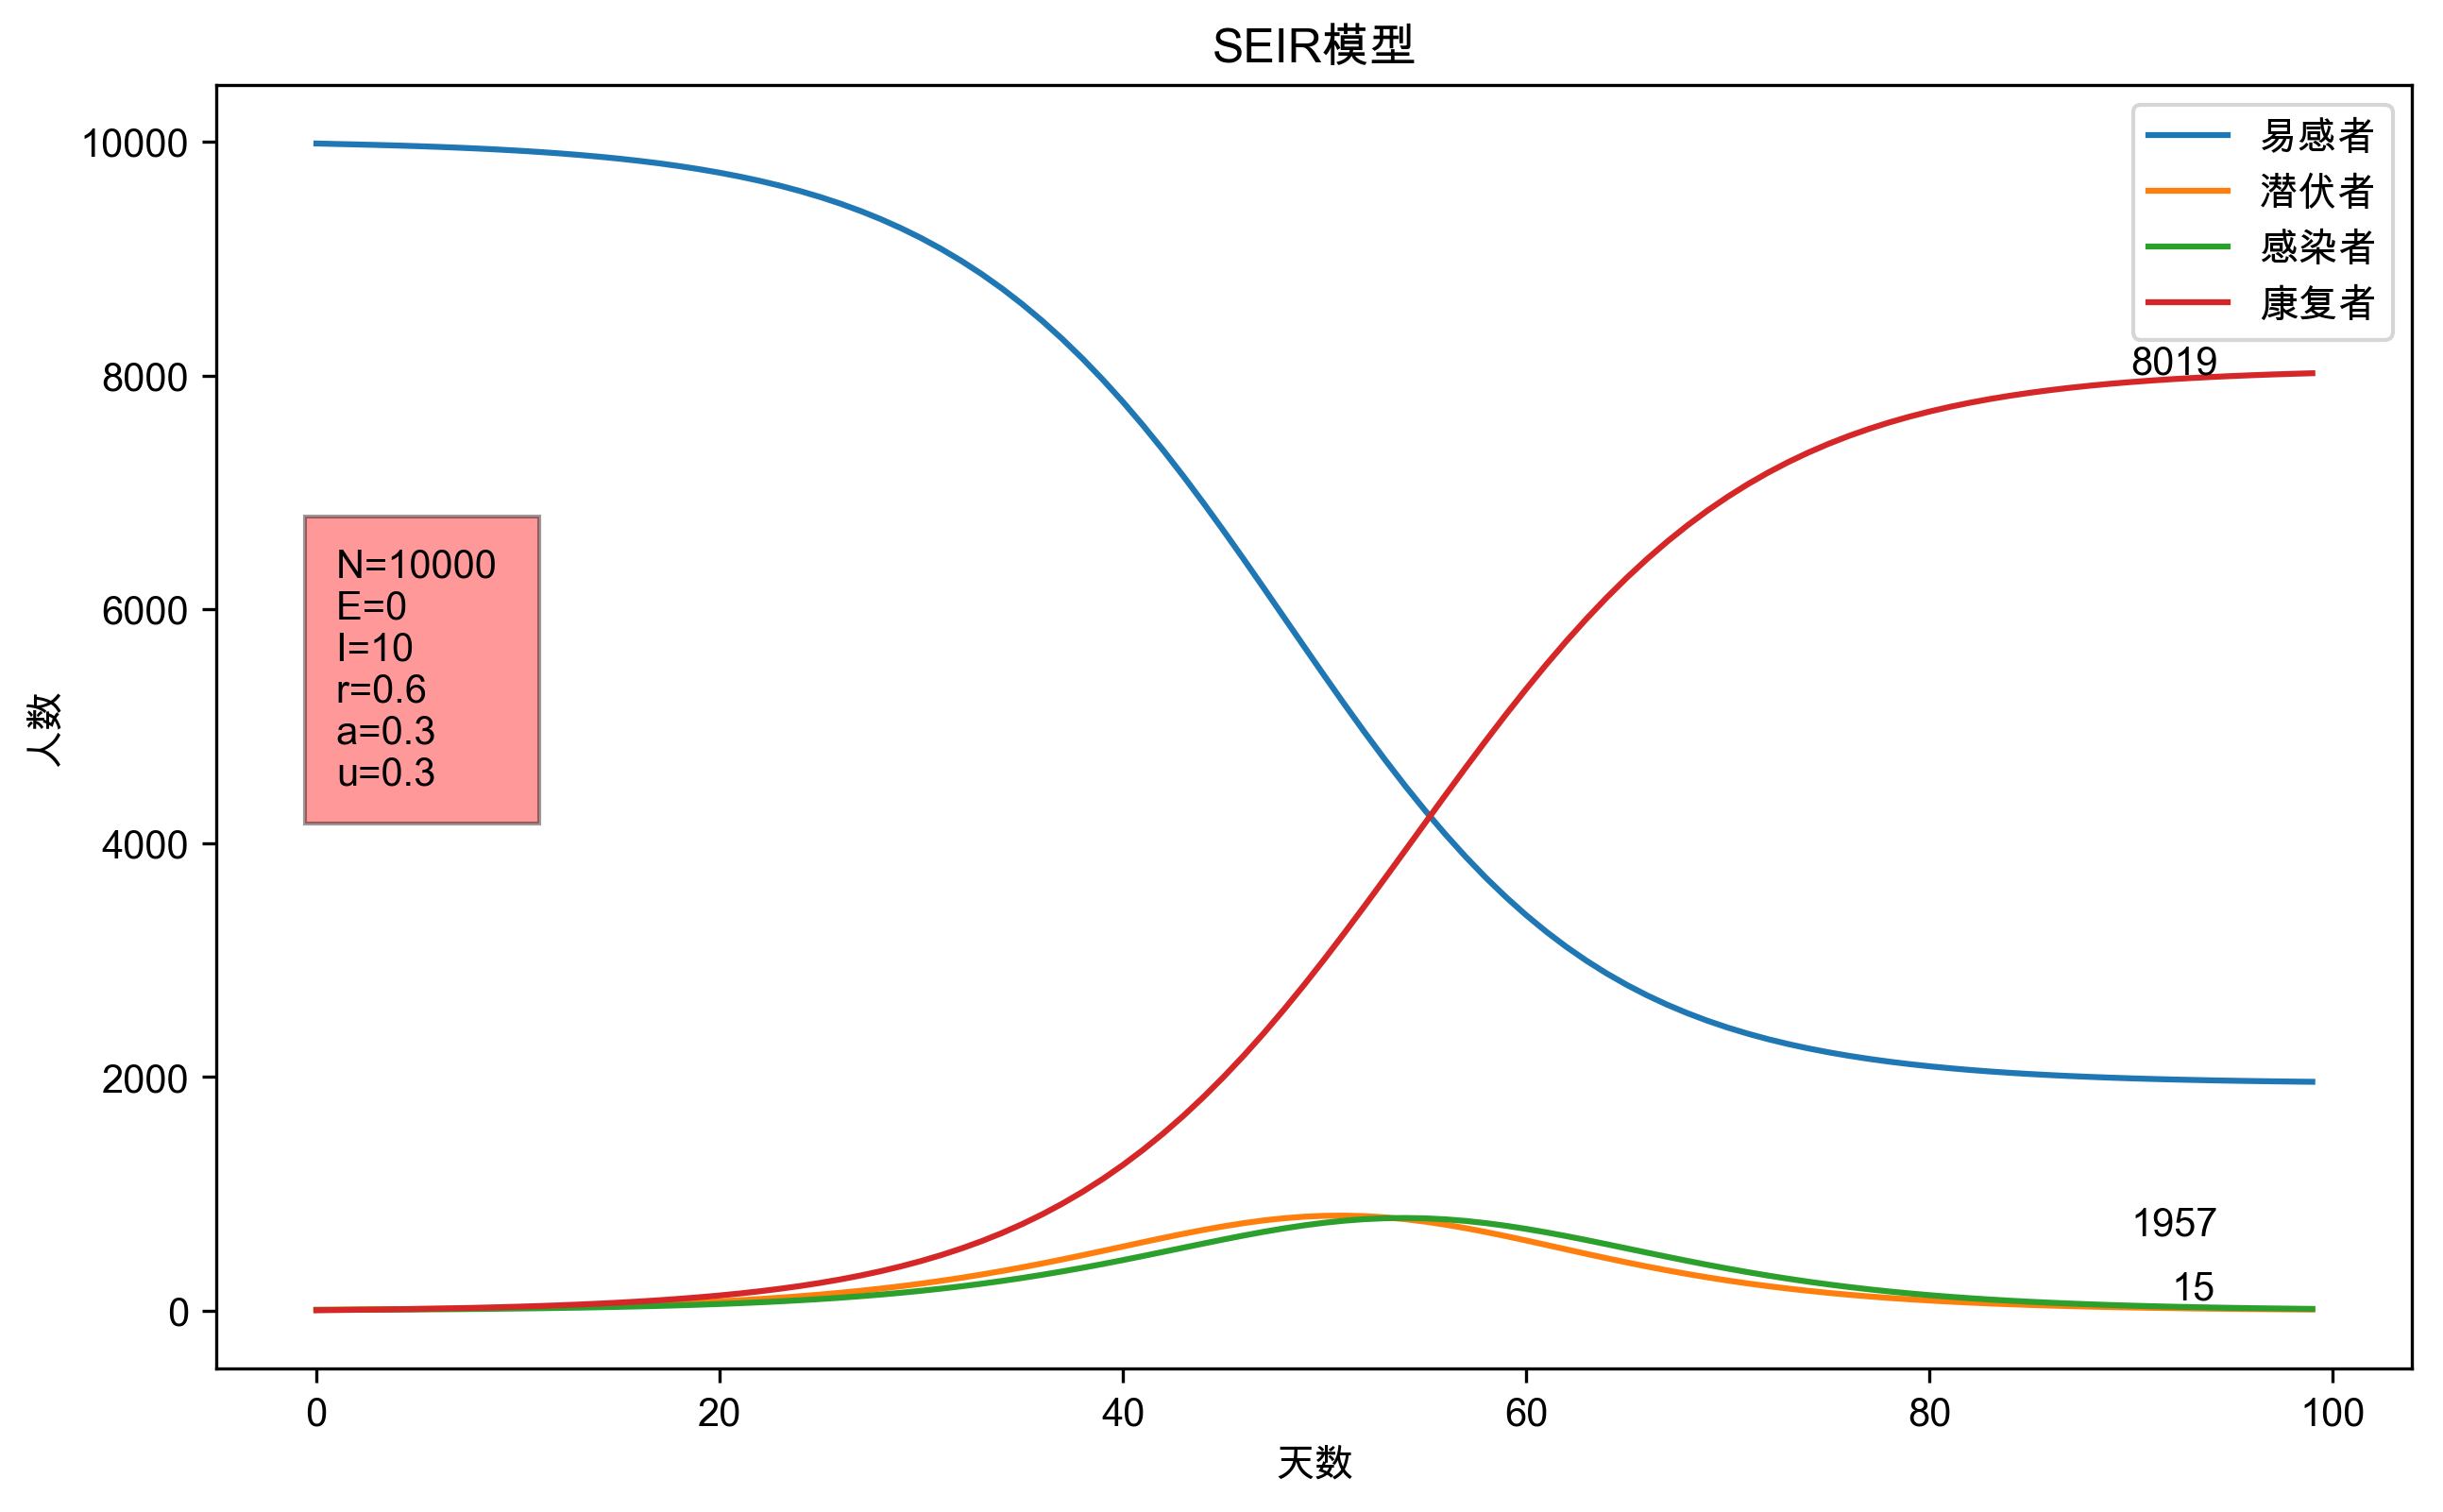

[1957.0, 9.0, 15.0, 8019.0]


In [202]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'Arial Unicode MS'  # 用来正常显示中文

# 定义SEIR函数——根据SEIR模型计算每天新增的易感人数，潜伏人数，感染人数，康复人数，返回累计人数
def SEIR(seir,dt):
    S,E,I,R = seir             # 每天初始SIR的数值
    dS = -(r*I*S)/N            # 易感者微分方程
    dE = (r*I*S)/N - a*E       # 潜伏者微分方程
    dI = a*E - u*I             # 感染者微分方程
    dR = u*I                   # 康复者微分方程
    S = 0 if S+dS*dt<=0 else S+dS*dt                        # 当天易感者人数
    E = 0 if E+dE*dt<=0 else (N if E+dE*dt>=N else E+dE*dt) # 当天潜伏者人数
    I = N if I+dI*dt>=N else (0 if I+dI*dt<=0 else I+dI*dt) # 当天感染者人数
    R = N if R+dR*dt>=N else (0 if R+dR*dt<=0 else R+dR*dt) # 当天康复者人数
    return [S, E, I, R]

def calculate(func,seir,days):  
    dt = 1
    t = np.arange(0,days,dt) # 设置时间步
    res=[]
    for itm in t:
        seir=func(seir,dt)      # 运行SEIR模型函数
        res.append(seir)       # 存储每天人数结果
    return np.array(res)

# 画图函数
def plot_graph(np_res): 
    plt.figure(figsize=(10,6),dpi=300)
    plt.plot(np_res[:,0])
    plt.plot(np_res[:,1])
    plt.plot(np_res[:,2])
    plt.plot(np_res[:,3])
    plt.title("SEIR模型")
    plt.xlabel("天数")
    plt.ylabel("人数")
    plt.legend(['易感者','潜伏者','感染者','康复者'])
    plt.text(1,4500,'N=%d \nE=%d  \nI=%d \nr=%2.1f \na=%2.1f \nu=%2.1f' % (N,E,I,r,a,u), bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 8})
    final = [round(x) for x in result[-1]]  # 取整表示
    plt.text(90,650,'%d' % final[0])
    plt.text(92,100,'%d' % final[2])
    plt.text(90,final[3],'%d' % final[3])
    plt.show()

# 赋初值、绘图
N = 10000
E = 0 
I = 10
r = 0.6
a = 0.3
u = 0.3
days = 100

seir= [N-I-E,    # 易感人数
       E,      # 潜伏人数
       I,      # 感染人数
       0]      # 康复人数

result = calculate(SEIR,seir,days)
plot_graph(result)
final = [round(x) for x in result[-1]]  # 取整表示
print(final)

## SEIJR模型

在SEIR模型的基础上考虑确诊情况，提出SEIJR模型。确诊病例 confirmed case.

在SEIJR模型中存在五种人：易感者，潜伏者，感染者（指患病的但未被确诊的人），确诊者，康复者（含死亡者）。

潜伏者有可能继续感染易感者，未确认感染者自我防护意识强不会感染其他人，确诊患者由于被强制隔离页不会感染其他人。

S表示易感者（尚未感染但是容易被感染的人） 的数量

E表示潜伏者（已经感染尚未发病的人）的数量

I表示感染者（已经感染的人）的数量

J表示确诊者（感染疾病并确诊的人）的数量

R表示康复者（包括治愈和死亡的人）的数量

N表示人口总数

r表示一个潜伏者平均每天感染易感者的人数 

$\alpha$ 表示潜伏者每天发展为感染者的比例

$\pi$ 表示潜伏者每天自愈的比例

$\mu$ 表示感染者每天康复（含死亡）的比例 

$\tau$ 表示感染者每天确诊的比例

那么每天易感者和感染者的数量变化为

$\begin{align}
dS &= \frac{-rSE}{N} \\
dE &= \frac{rSE}{N} - \alpha E - \pi E \\
dI &= \alpha E - \mu I \\
dJ &= \tau I \\
dR &= \pi E + \mu I \\
\end{align}$

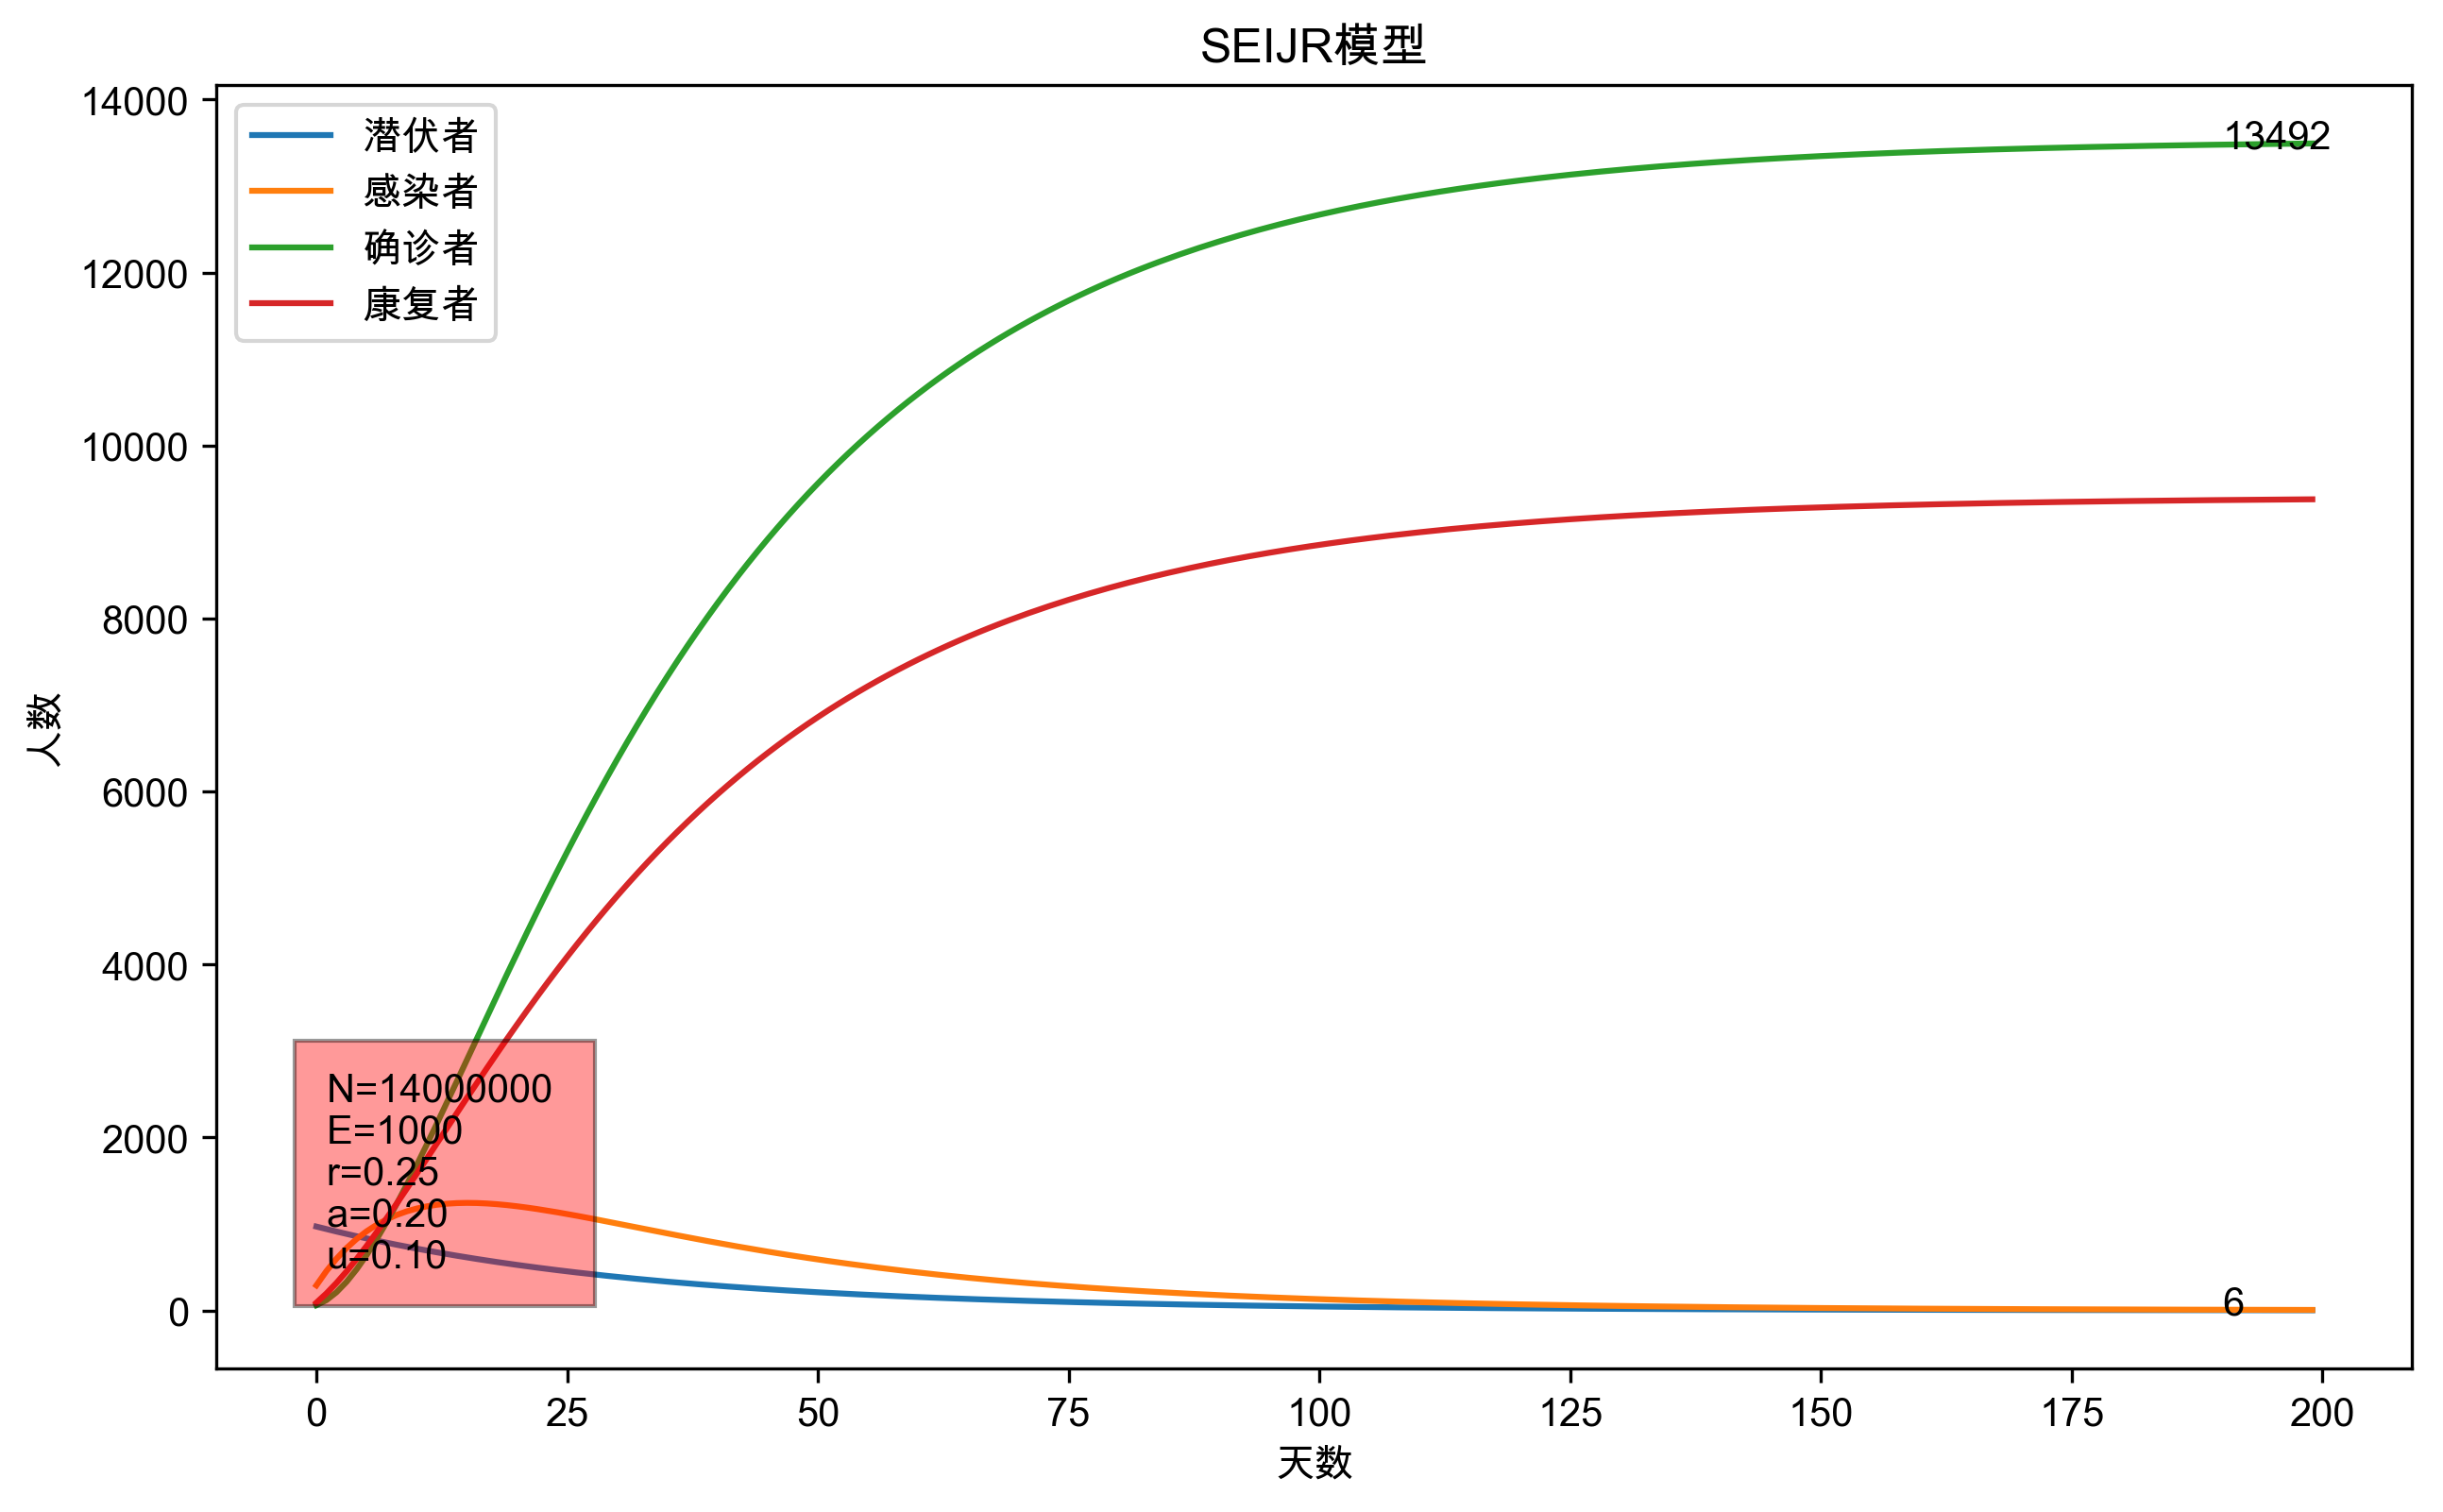

[13990713.0, 2.0, 6.0, 13492.0, 9378.0]


In [206]:
def SEIJR(seijr,dt):
    S,E,I,J,R = seijr
    dS = -(r*E*S)/N                  # 易感者微分方程
    dE = (r*E*S)/N - a*E -p*E        # 潜伏者微分方程
    dI = a*E - u*I                   # 感染者微分方程
    dJ = t*I                         # 确诊者微分方程
    dR = p*E + u*I                   # 康复者微分方程
    S = 0 if S+dS*dt<=0 else S+dS*dt                        # 当天易感者人数
    E = 0 if E+dE*dt<=0 else (N if E+dE*dt>=N else E+dE*dt) # 当天潜伏者人数
    I = N if I+dI*dt>=N else (0 if I+dI*dt<=0 else I+dI*dt) # 当天感染者人数
    J = N if J+dJ*dt>=N else (0 if J+dJ*dt<=0 else J+dJ*dt) # 当天感染者人数
    R = N if R+dR*dt>=N else (0 if R+dR*dt<=0 else R+dR*dt) # 当天康复者人数
    return [S, E, I, J, R]

def calculate(func,seijr,days):  
    dt = 1
    t = np.arange(0,days,dt) # 设置时间步
    res=[]
    for itm in t:
        seijr=func(seijr,dt)      # 运行SEIR模型函数
        res.append(seijr)       # 存储每天人数结果
    return np.array(res)

# 画图函数
def plot_graph(np_res): 
    plt.figure(figsize=(10,6),dpi=300)
#     plt.plot(np_res[:,0])
    plt.plot(np_res[:,1])
    plt.plot(np_res[:,2])
    plt.plot(np_res[:,3])
    plt.plot(np_res[:,4])
    plt.title("SEIJR模型")
    plt.xlabel("天数")
    plt.ylabel("人数")
    plt.legend(['潜伏者','感染者','确诊者','康复者']) # '易感者',
    plt.text(1,500,'N=%d \nE=%d \nr=%3.2f \na=%3.2f \nu=%3.2f' % (N,E,r,a,u), bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 8})
    final = [round(x) for x in result[-1]]  # 取整表示
#     plt.text(90,final[0]+100,'%d' % final[0])  # 易感人数
#     plt.text(90,final[1]+100,'%d' % final[1])  # 潜伏人数
    plt.text(days-10,final[2]-50,'%d' % final[2])  # 感染人数
    plt.text(days-10,final[3]-50,'%d' % final[3])  # 确诊人数
#     plt.text(90,final[4]+100,'%d' % final[4])  # 康复人数
    plt.show()

# 赋初值、绘图
N = 14000000
E = 1000
I = 100
J = 41
r = 0.25
a = 0.2
u = 0.1
p = 0.08
t = 0.2
days = 200

seijr = [N-E,    # 易感人数
         E,      # 潜伏人数
         I,      # 感染人数
         J,      # 确诊人数
         0]      # 康复人数

result = calculate(SEIJR,seijr,days)
plot_graph(result)
final = [round(x) for x in result[-1]]  # 取整表示
print(final)

## SEIJRD模型

考虑到全面防控等严格隔离措施，将感染率设为参数可调，提出SEIJRD模型。

该模型分为两个阶段，采取隔离措施前r较大；采取隔离措施后r较大；增加死亡者微分方程。

S表示易感者（尚未感染但是容易被感染的人） 的数量

E表示潜伏者（已经感染尚未发病的人）的数量

I表示感染者（已经感染的人）的数量

J表示确诊者（感染疾病并确诊的人）的数量

R表示康复者（治愈患者）的数量

D表示康复者（死亡患者）的数量

N表示人口总数

r表示一个潜伏者平均每天感染易感者的人数 

$\alpha$ 表示潜伏者每天发展为感染者的比例

$\pi$ 表示潜伏者每天自愈的比例

$\mu$ 表示感染者每天康复的比例 

$\tau$ 表示感染者每天确诊的比例

$\omega$ 表示感染者每天死亡的比例

那么每天易感者和感染者的数量变化为

$\begin{align}
dS &= \frac{-rSE}{N} \\
dE &= \frac{rSE}{N} - \alpha E - \pi E \\
dI &= \alpha E - \mu I - \omega I\\
dJ &= \tau I \\
dR &= \pi E + \mu I \\
dD &= \omega I \\
\end{align}$

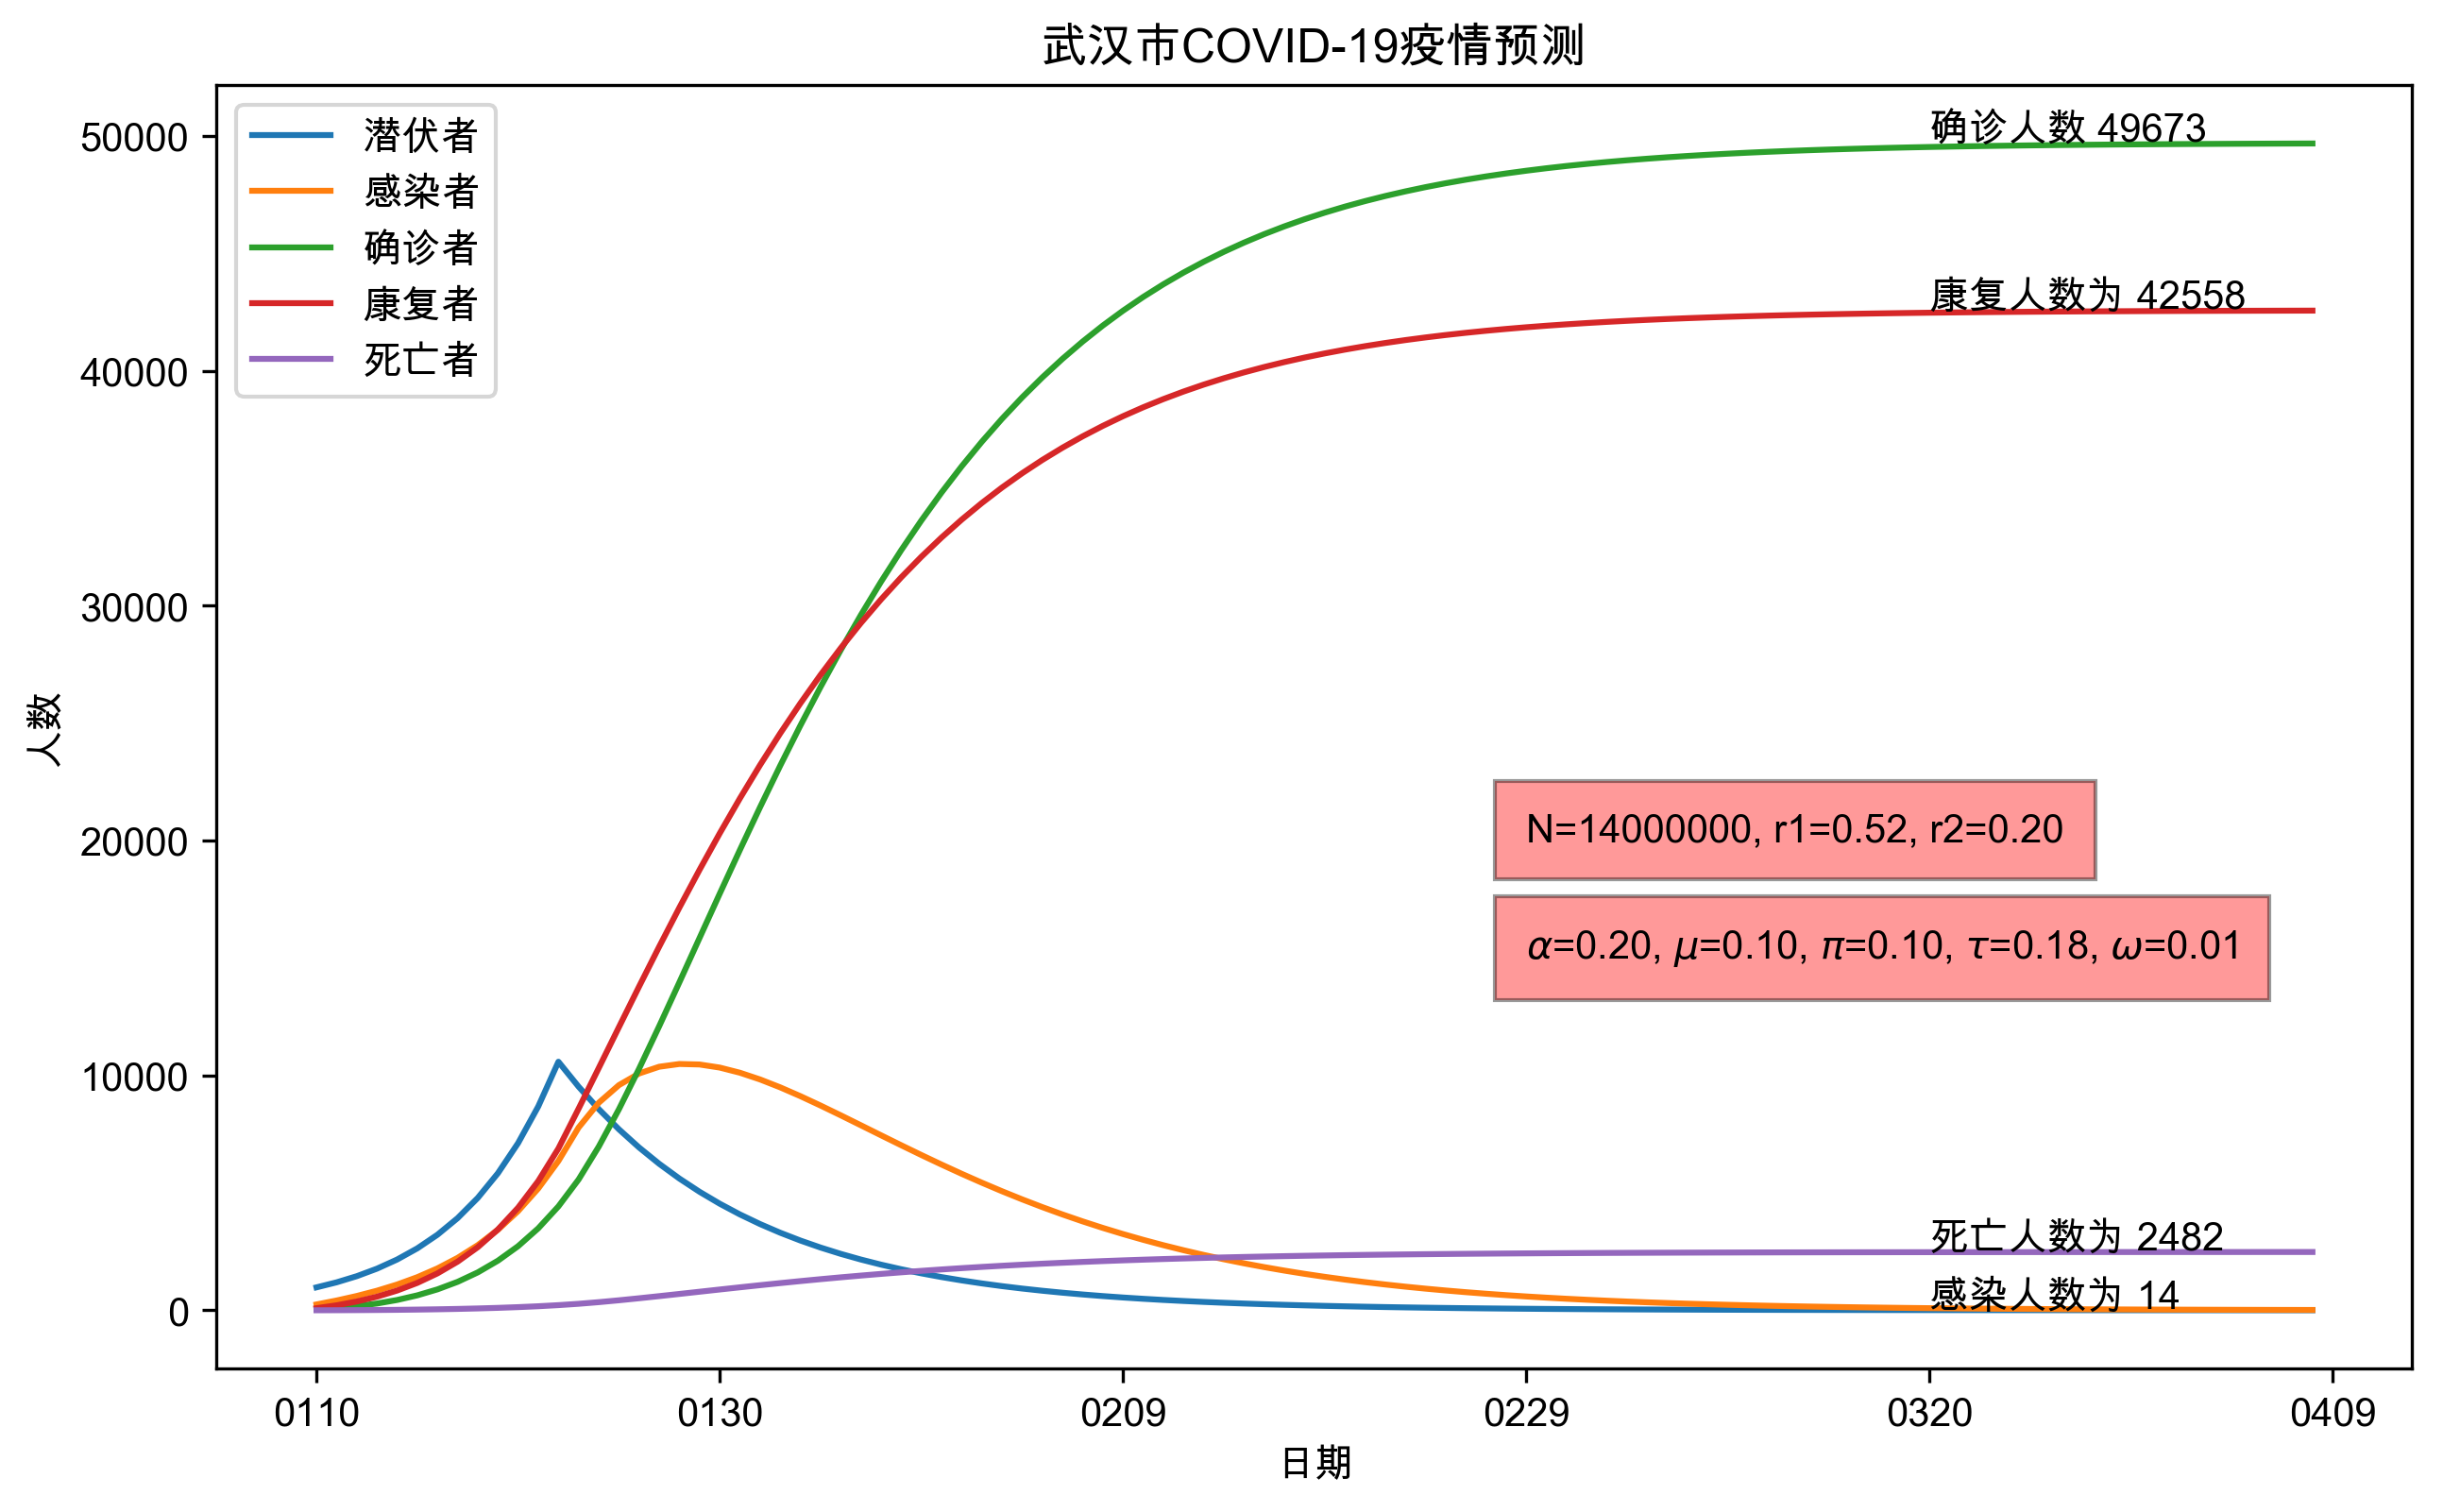

[13955046.0, 1.0, 14.0, 49673.0, 42558.0, 2482.0]


In [218]:
def SEIJRD(seijrd,para,dt):
    S,E,I,J,R,D = seijrd
    r,a,u,p,t,w = para   # 赋值
    dS = -(r*E*S)/N                  # 易感者微分方程
    dE = (r*E*S)/N - a*E -p*E        # 潜伏者微分方程
    dI = a*E - u*I - w*I             # 感染者微分方程
    dJ = t*I                         # 确诊者微分方程
    dR = p*E + u*I                   # 康复者微分方程
    dD = w*I                         # 死亡者微分方程
    
    S = 0 if S+dS*dt<=0 else S+dS*dt                        # 当天易感者人数
    E = 0 if E+dE*dt<=0 else (N if E+dE*dt>=N else E+dE*dt) # 当天潜伏者人数
    I = N if I+dI*dt>=N else (0 if I+dI*dt<=0 else I+dI*dt) # 当天感染者人数
    J = N if J+dJ*dt>=N else (0 if J+dJ*dt<=0 else J+dJ*dt) # 当天感染者人数
    R = N if R+dR*dt>=N else (0 if R+dR*dt<=0 else R+dR*dt) # 当天康复者人数
    D = N if D+dD*dt>=N else (0 if D+dD*dt<=0 else D+dD*dt) # 当天死亡者人数
    return [S, E, I, J, R, D]

def calculate(func,seijrd,days):  
    dt = 1
    t = np.arange(0,days,dt) # 设置时间步
    res=[]
    for itm in t:
        if itm < 13:
            seijrd=func(seijrd,para1,dt)      # 运行SEIJR模型函数
        else:
            seijrd=func(seijrd,para2,dt)      # 运行SEIJR模型函数
        res.append(seijrd)                   # 存储每天人数结果
    return np.array(res)

# 画图函数
def plot_graph(np_res): 
    plt.figure(figsize=(10,6),dpi=300)
    ax = plt.subplot(111)
#     plt.plot(np_res[:,0])
    plt.plot(np_res[:,1])
    plt.plot(np_res[:,2])
    plt.plot(np_res[:,3])
    plt.plot(np_res[:,4])
    plt.plot(np_res[:,5])
    ax.set_xticks([0,20,40,60,80,100])
    ax.set_xticklabels(['0110','0130','0209','0229','0320','0409'])
    plt.title("武汉市COVID-19疫情预测")
    plt.xlabel('日期')
    plt.ylabel("人数")
    plt.legend(['潜伏者','感染者','确诊者','康复者','死亡者']) # '易感者',
    plt.text(60,20000,'N=%d, r1=%3.2f, r2=%3.2f' \
             % (14000000,0.52,0.2), \
             bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 8})
    plt.text(60,15000,r'$\alpha$=%3.2f, $\mu$=%3.2f, $\pi$=%3.2f, $\tau$=%3.2f, $\omega$=%3.2f' \
             % (0.2,0.1,0.1,0.18,0.009), \
             bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 8})
    final = [round(x) for x in result[-1]]  # 取整表示
#     plt.text(90,final[0]+100,'%d' % final[0])  # 易感人数
#     plt.text(90,final[1]+100,'%d' % final[1])  # 潜伏人数
    plt.text(days-20,final[2]+100,'感染人数为 %d' % final[2])   # 感染人数
    plt.text(days-20,final[3]+100,'确诊人数 %d' % final[3])     # 确诊人数
    plt.text(days-20,final[4]+100,'康复人数为 %d' % final[4])  # 康复人数
    plt.text(days-20,final[5]+100,'死亡人数为 %d' % final[5])  # 死亡人数
    
    plt.show()

# 武汉
N = 14000000
E = 800
I = 100
J = 41
days = 100
para1 = [0.52,0.2,0.1,0.1,0.18,0.009]
para2 = [0.2,0.2,0.1,0.1,0.18,0.009]

seijrd = [N-E,   # 易感人数
         E,      # 潜伏人数
         I,      # 感染人数
         J,      # 确诊人数
         0,      # 死亡人数
         0]      # 康复人数


result = calculate(SEIJRD,seijrd,days)
plot_graph(result)
final = [round(x) for x in result[-1]]  # 取整表示
print(final)

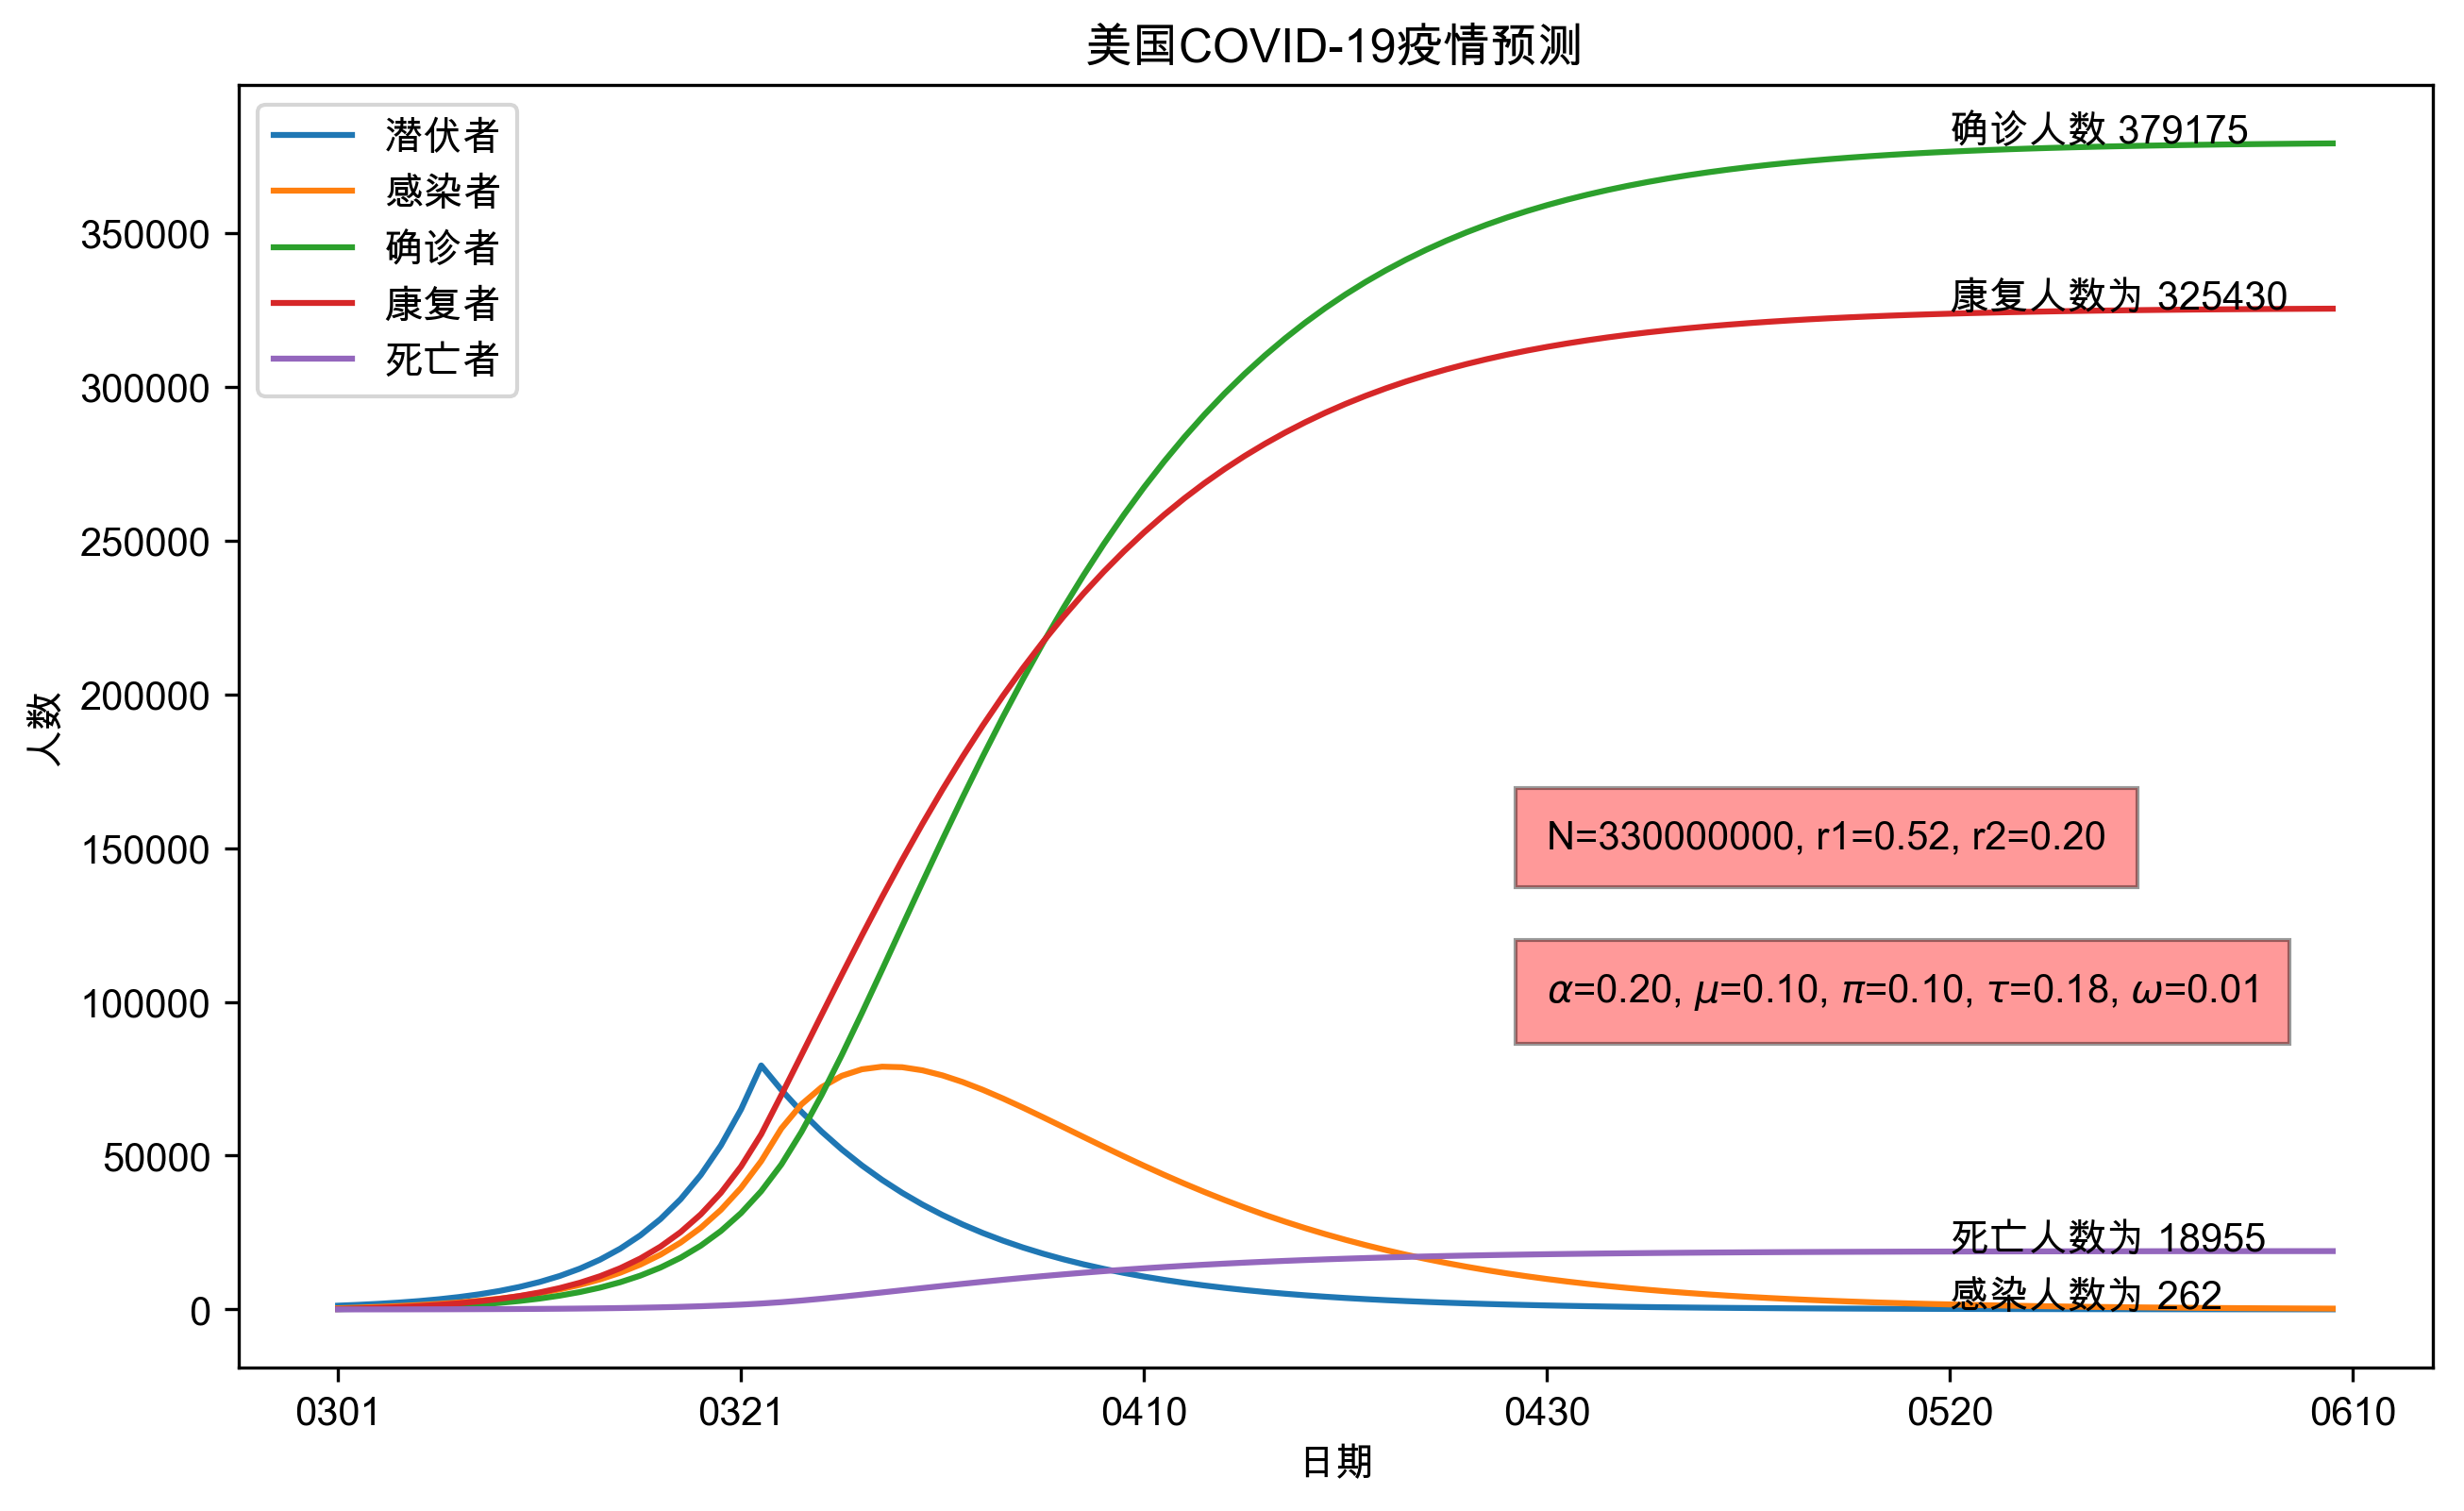

[329655532.0, 21.0, 262.0, 379175.0, 325430.0, 18955.0]


In [224]:
# 美国 3.3亿人口

def SEIJRD(seijrd,para,dt):
    S,E,I,J,R,D = seijrd
    r,a,u,p,t,w = para   # 赋值
    dS = -(r*E*S)/N                  # 易感者微分方程
    dE = (r*E*S)/N - a*E -p*E        # 潜伏者微分方程
    dI = a*E - u*I - w*I             # 感染者微分方程
    dJ = t*I                         # 确诊者微分方程
    dR = p*E + u*I                   # 康复者微分方程
    dD = w*I                         # 死亡者微分方程
    
    S = 0 if S+dS*dt<=0 else S+dS*dt                        # 当天易感者人数
    E = 0 if E+dE*dt<=0 else (N if E+dE*dt>=N else E+dE*dt) # 当天潜伏者人数
    I = N if I+dI*dt>=N else (0 if I+dI*dt<=0 else I+dI*dt) # 当天感染者人数
    J = N if J+dJ*dt>=N else (0 if J+dJ*dt<=0 else J+dJ*dt) # 当天感染者人数
    R = N if R+dR*dt>=N else (0 if R+dR*dt<=0 else R+dR*dt) # 当天康复者人数
    D = N if D+dD*dt>=N else (0 if D+dD*dt<=0 else D+dD*dt) # 当天死亡者人数
    return [S, E, I, J, R, D]

def calculate(func,seijrd,days):  
    dt = 1
    t = np.arange(0,days,dt) # 设置时间步
    res=[]
    for itm in t:
        if itm < 22:
            seijrd=func(seijrd,para1,dt)      # 运行SEIJR模型函数
        else:
            seijrd=func(seijrd,para2,dt)      # 运行SEIJR模型函数
        res.append(seijrd)                   # 存储每天人数结果
    return np.array(res)

# 画图函数
def plot_graph(np_res): 
    plt.figure(figsize=(10,6),dpi=300)
    ax = plt.subplot(111)
#     plt.plot(np_res[:,0])
    plt.plot(np_res[:,1])
    plt.plot(np_res[:,2])
    plt.plot(np_res[:,3])
    plt.plot(np_res[:,4])
    plt.plot(np_res[:,5])
    ax.set_xticks([0,20,40,60,80,100])
    ax.set_xticklabels(['0301','0321','0410','0430','0520','0610'])
    plt.title("美国COVID-19疫情预测")
    plt.xlabel('日期')
    plt.ylabel("人数")
    plt.legend(['潜伏者','感染者','确诊者','康复者','死亡者']) # '易感者',
    plt.text(60,150000,'N=%d, r1=%3.2f, r2=%3.2f' \
             % (330000000,0.52,0.2), \
             bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 8})
    plt.text(60,100000,r'$\alpha$=%3.2f, $\mu$=%3.2f, $\pi$=%3.2f, $\tau$=%3.2f, $\omega$=%3.2f' \
             % (0.2,0.1,0.1,0.18,0.009), \
             bbox={'facecolor': 'red', 'alpha': 0.4, 'pad': 8})
    final = [round(x) for x in result[-1]]  # 取整表示
#     plt.text(90,final[0]+100,'%d' % final[0])  # 易感人数
#     plt.text(90,final[1]+100,'%d' % final[1])  # 潜伏人数
    plt.text(days-20,final[2]+100,'感染人数为 %d' % final[2])   # 感染人数
    plt.text(days-20,final[3]+100,'确诊人数 %d' % final[3])     # 确诊人数
    plt.text(days-20,final[4]+100,'康复人数为 %d' % final[4])  # 康复人数
    plt.text(days-20,final[5]+100,'死亡人数为 %d' % final[5])  # 死亡人数
    
    plt.show()

# 赋初值、绘图
N = 330000000
E = 1000
I = 200
J = 69
days = 100
para1 = [0.52,0.2,0.1,0.1,0.18,0.009]
para2 = [0.2,0.2,0.1,0.1,0.18,0.009]

seijrd = [N-E,   # 易感人数
         E,      # 潜伏人数
         I,      # 感染人数
         J,      # 确诊人数
         0,      # 死亡人数
         0]      # 康复人数


result = calculate(SEIJRD,seijrd,days)
plot_graph(result)
final = [round(x) for x in result[-1]]  # 取整表示
print(final)

从上面两幅图可以看出，采取隔离措施的时间点很关键，早点隔离就能大幅度减少感染者，尽早防控住疫情。